In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_best_bid(row, mm=True):
    range_ = range(1, 4) if mm is False else range(3, 0, -1)
    for i in range_:  # Check bid_price_1, bid_price_2, bid_price_3
        price_col = f'bid_price_{i}'
        volume_col = f'bid_volume_{i}'
        
        if pd.notna(row[price_col]) and pd.notna(row[volume_col]) and row[volume_col] > 0:
            return row[price_col]
    return np.nan
def get_best_ask(row, mm=True):
    range_ = range(1, 4) if mm is False else range(3, 0, -1)
    for i in range_:  # Check ask_price_1, ask_price_2, ask_price_3
        price_col = f'ask_price_{i}'
        volume_col = f'ask_volume_{i}'
        
        if pd.notna(row[price_col]) and pd.notna(row[volume_col]) and row[volume_col] > 0:
            return row[price_col]
    return np.nan

In [3]:
data_day_minus_1 = pd.read_csv('../round-2-island-data-bottle/prices_round_2_day_-1.csv', sep=';')
data_day_minus_1['best_bid'] = data_day_minus_1.apply(get_best_bid, axis=1)
data_day_minus_1['best_ask'] = data_day_minus_1.apply(get_best_ask, axis=1)
data_day_minus_1['spread'] = data_day_minus_1['best_ask'] - data_day_minus_1['best_bid']
data_day_minus_1 = data_day_minus_1.pivot(columns=['product'], values=['mid_price', 'spread'], index='timestamp')

data_day_0 = pd.read_csv('../round-2-island-data-bottle/prices_round_2_day_0.csv', sep=';')
data_day_0['best_bid'] = data_day_0.apply(get_best_bid, axis=1)
data_day_0['best_ask'] = data_day_0.apply(get_best_ask, axis=1)
data_day_0['spread'] = data_day_0['best_ask'] - data_day_0['best_bid']
data_day_0 = data_day_0.pivot(columns=['product'], values=['mid_price', 'spread'], index='timestamp')

data_day_1 = pd.read_csv('../round-2-island-data-bottle/prices_round_2_day_1.csv', sep=';')
data_day_1['best_bid'] = data_day_1.apply(get_best_bid, axis=1)
data_day_1['best_ask'] = data_day_1.apply(get_best_ask, axis=1)
data_day_1['spread'] = data_day_1['best_ask'] - data_day_1['best_bid']
data_day_1 = data_day_1.pivot(columns=['product'], values=['mid_price', 'spread'], index='timestamp')

### Squid

In [29]:
squid_ink_minus_1 = data_day_minus_1['mid_price', 'SQUID_INK']
squid_ink_minus_1_returns = squid_ink_minus_1.pct_change()
squid_ink_0 = data_day_0['mid_price', 'SQUID_INK']
squid_ink_0_returns = squid_ink_0.pct_change()
squid_ink_1 = data_day_1['mid_price', 'SQUID_INK']
squid_ink_1_returns = squid_ink_1.pct_change()

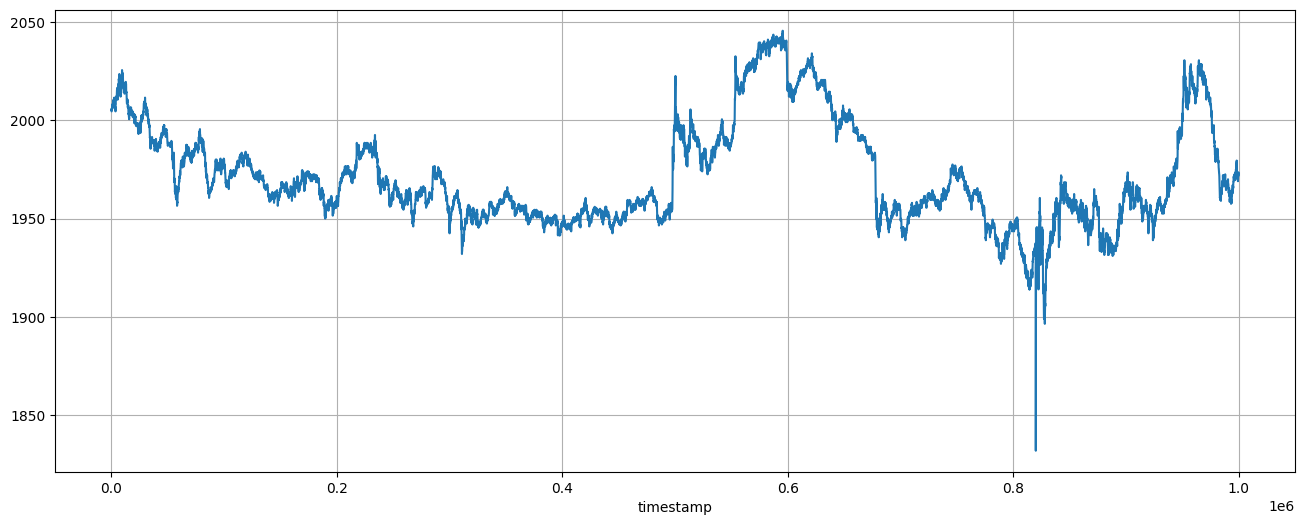

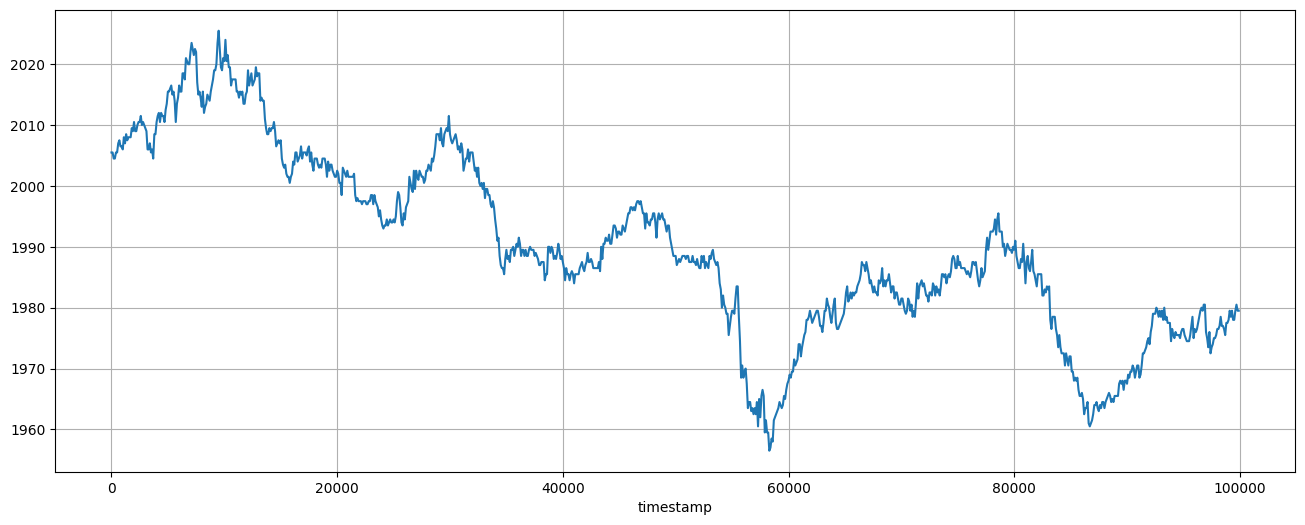

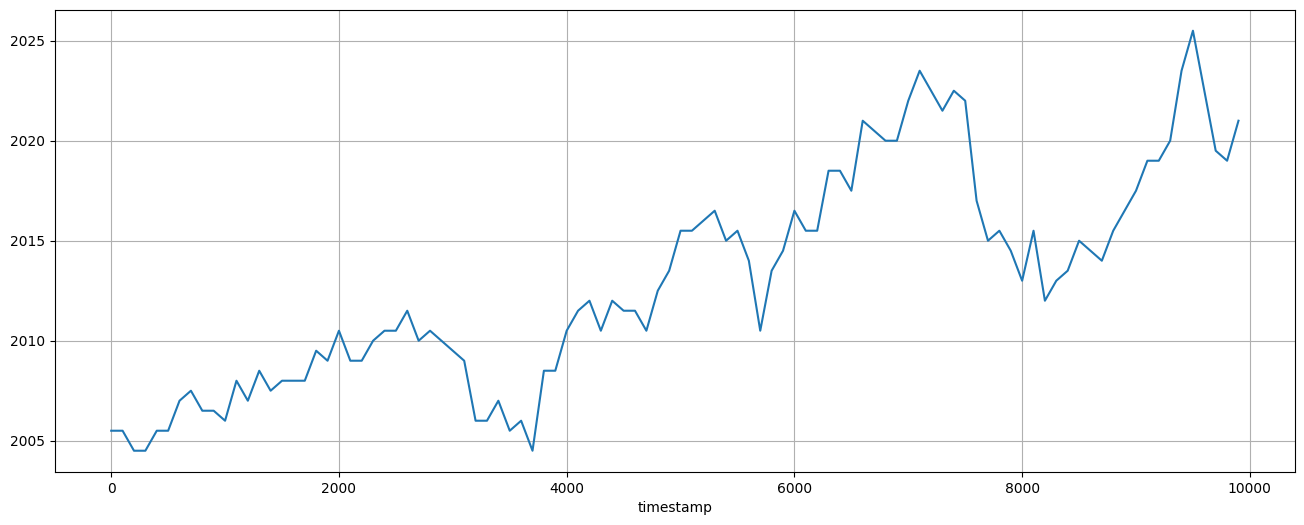

In [31]:
# Price series
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1.plot(ax=ax)
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1[:1000].plot(ax=ax)
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1[:100].plot(ax=ax)
ax.grid()
plt.show()

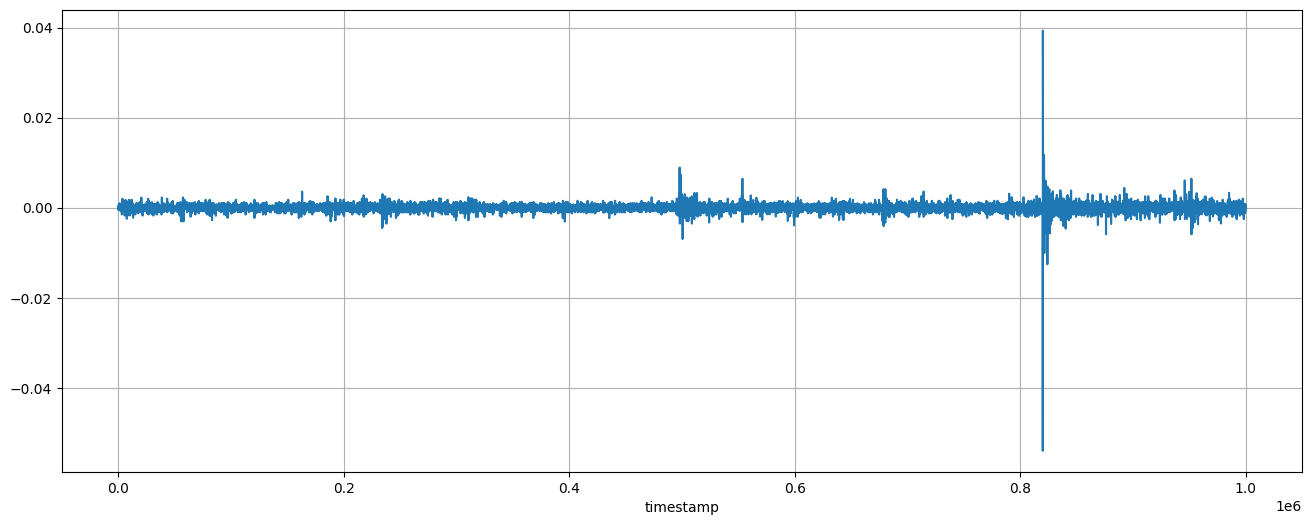

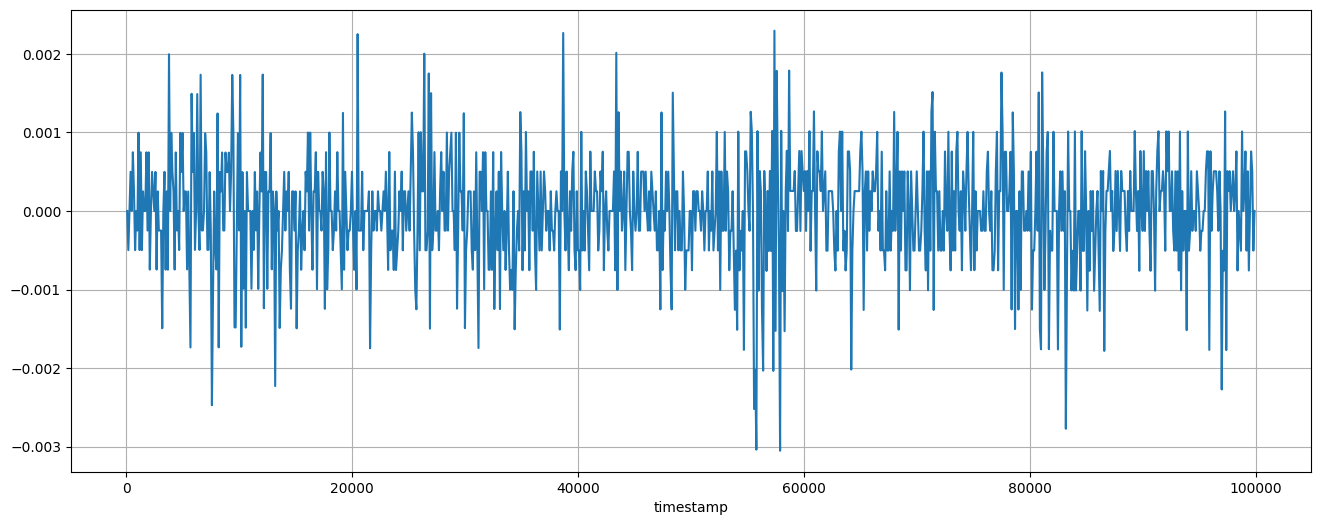

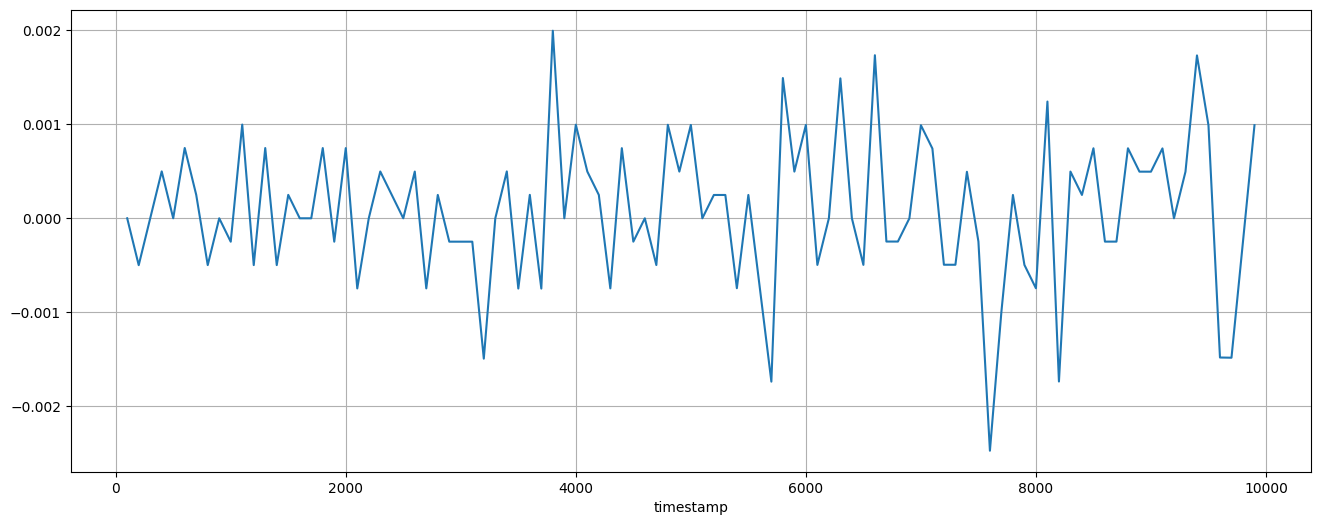

In [ ]:
# Returns series
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_returns.plot(ax=ax)
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_returns[:1000].plot(ax=ax)
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_returns[:100].plot(ax=ax)
ax.grid()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

X = squid_ink_minus_1_returns.fillna(0).values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.309575
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


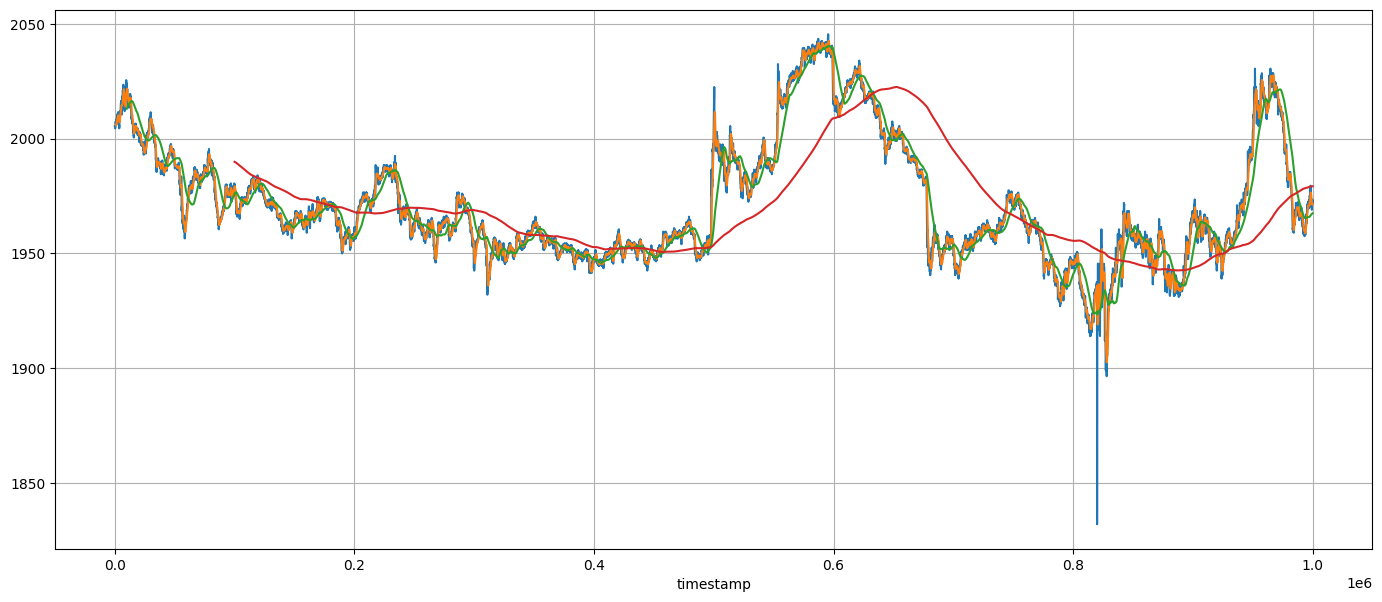

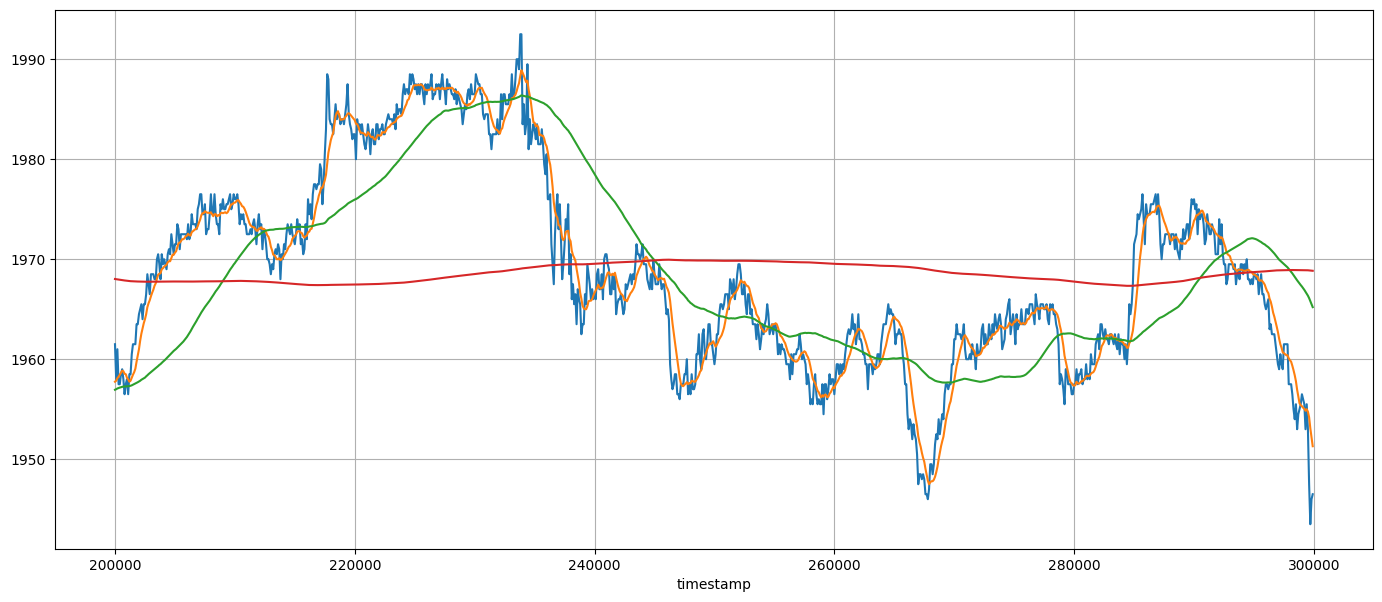

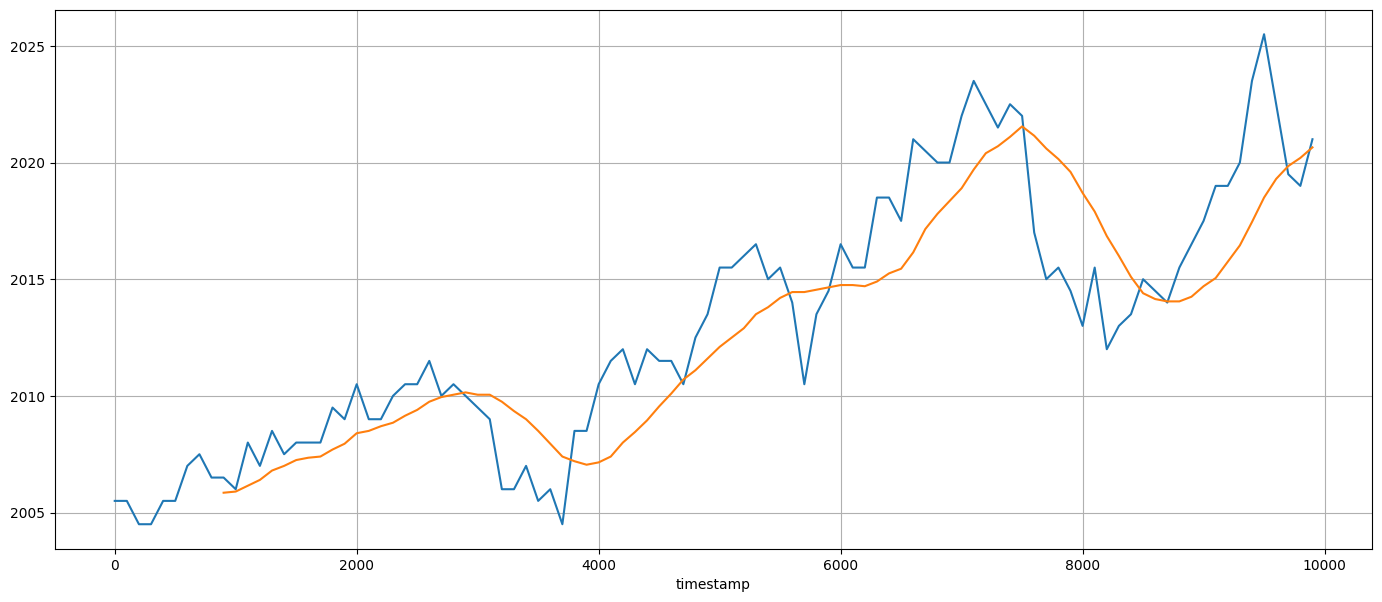

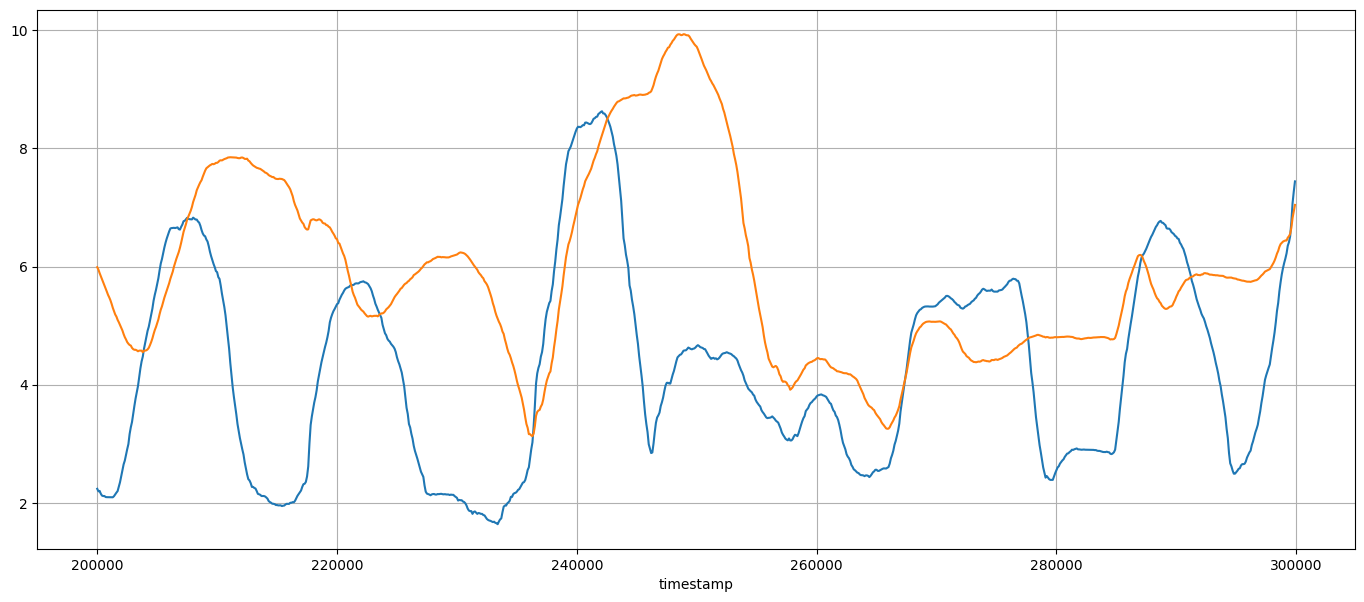

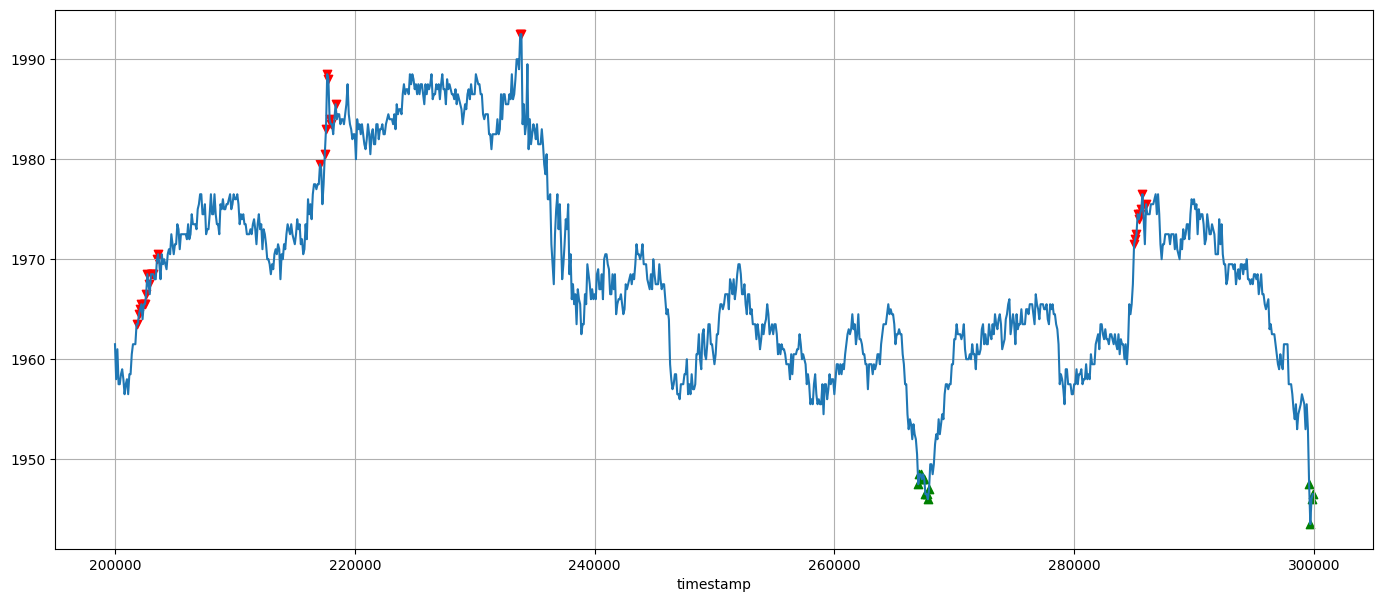

In [ ]:
# Rolling series
fig, ax = plt.subplots(figsize=(17, 7))
squid_ink_minus_1.plot(ax=ax)
squid_ink_minus_1.rolling(10).mean().plot(ax=ax)
squid_ink_minus_1.rolling(100).mean().plot(ax=ax)
squid_ink_minus_1.rolling(1000).mean().plot(ax=ax)
ax.grid()
plt.show()

timeframe = slice(2000,3000)
fig, ax = plt.subplots(figsize=(17, 7))
squid_ink_minus_1[timeframe].plot(ax=ax)
squid_ink_minus_1.rolling(10).mean()[timeframe].plot(ax=ax)
squid_ink_minus_1.rolling(100).mean()[timeframe].plot(ax=ax)
squid_ink_minus_1.rolling(1000).mean()[timeframe].plot(ax=ax)
ax.grid()
plt.show()

fig, ax = plt.subplots(figsize=(17, 7))
squid_ink_minus_1[:100].plot(ax=ax)
squid_ink_minus_1.rolling(10).mean()[:100].plot(ax=ax)
squid_ink_minus_1.rolling(100).mean()[:100].plot(ax=ax)
squid_ink_minus_1.rolling(1000).mean()[:100].plot(ax=ax)
ax.grid()
plt.show()

fig, ax = plt.subplots(figsize=(17, 7))
vol_100 = squid_ink_minus_1.rolling(100).std()
vol_100[timeframe].plot(ax=ax)
vol_10 = squid_ink_minus_1.rolling(200).std()
vol_10[timeframe].plot(ax=ax)
ax.grid()
plt.show()

fig, ax = plt.subplots(figsize=(17, 7))
sma_100 = squid_ink_minus_1.rolling(100).mean()
sma_10 = squid_ink_minus_1.rolling(500).mean()
vol_100 = squid_ink_minus_1.rolling(100).std()
vol_10 = squid_ink_minus_1.rolling(500).std()
z_score_sell = ((squid_ink_minus_1 - sma_100)/vol_100)
z_score_buy = ((squid_ink_minus_1 - sma_10)/vol_10)
sell_signals = (z_score_sell[timeframe]>1.8) 
buy_signals = (z_score_buy[timeframe]<-2.) 
ax.scatter(squid_ink_minus_1[timeframe].index[sell_signals], squid_ink_minus_1[timeframe][sell_signals ], marker='v', c='red')
ax.scatter(squid_ink_minus_1[timeframe].index[buy_signals], squid_ink_minus_1[timeframe][buy_signals], marker='^', c='green')
squid_ink_minus_1[timeframe].plot(ax=ax)
ax.grid()
plt.show()

In [32]:
# Spread analysis
squid_ink_minus_1_spread = data_day_minus_1['spread', 'SQUID_INK']
squid_ink_0_spread = data_day_0['spread', 'SQUID_INK']
squid_ink_1_spread = data_day_1['spread', 'SQUID_INK']

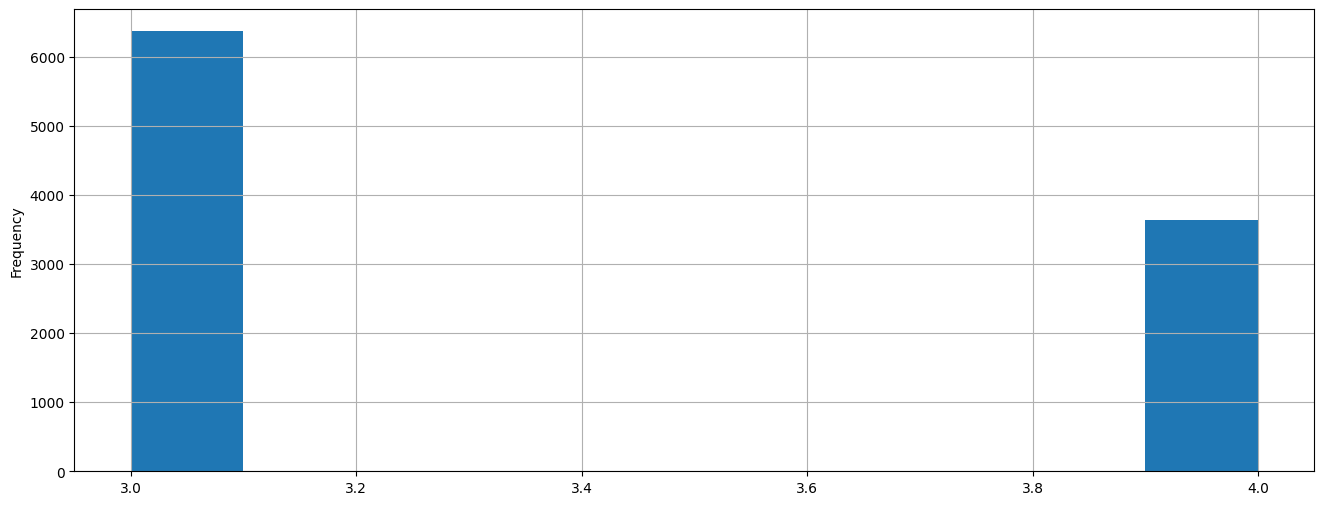

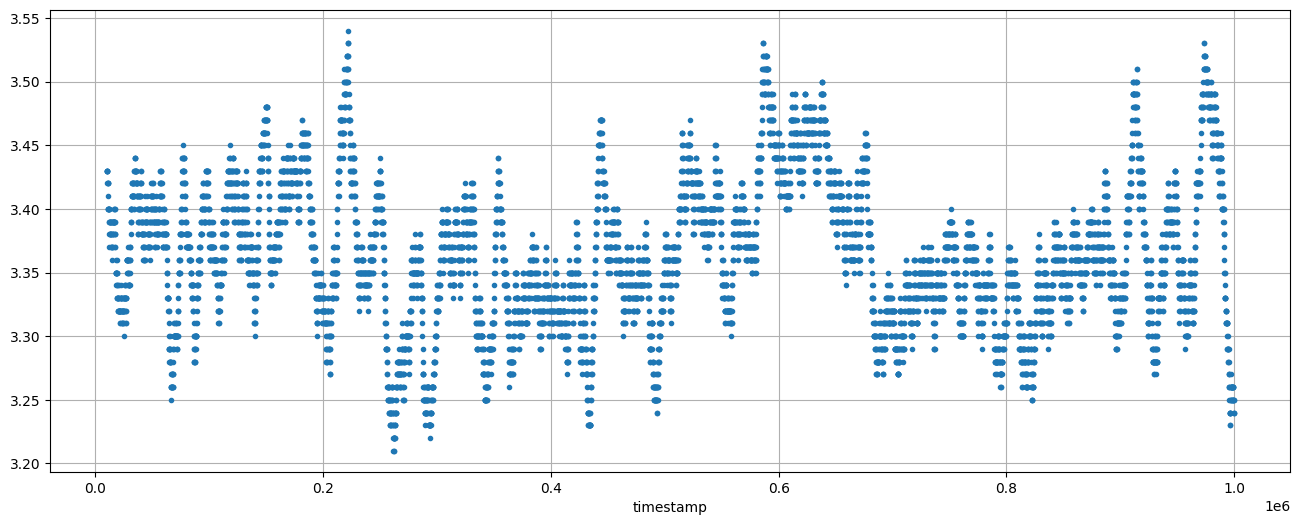

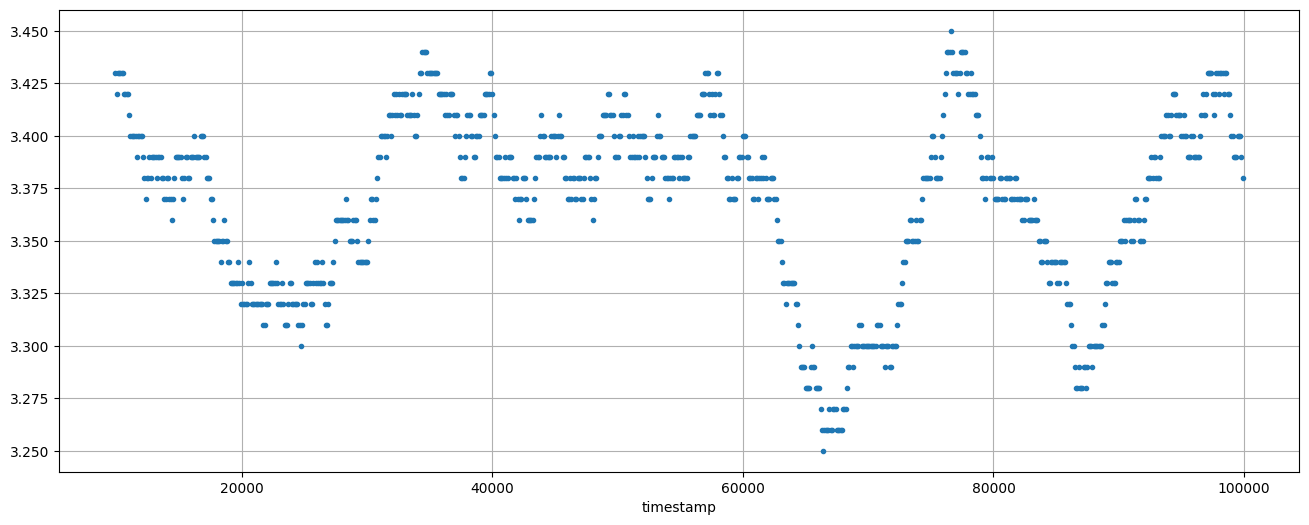

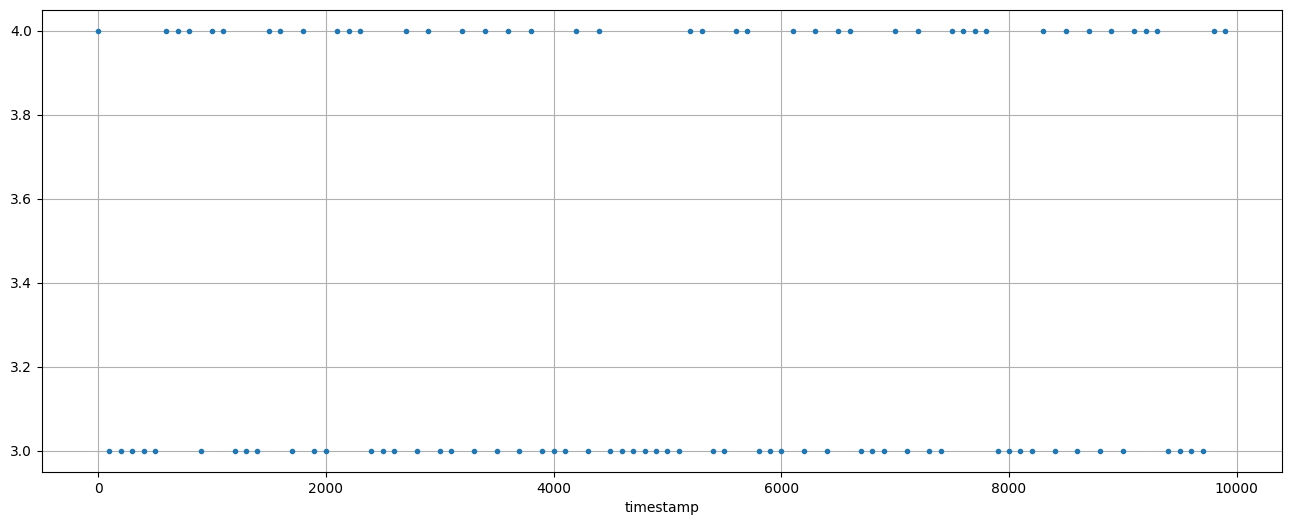

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_spread.plot(ax=ax, kind='hist')
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_spread.rolling(100).mean().plot(ax=ax, marker='.', linestyle='none')
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_spread.rolling(100).mean()[:1000].plot(ax=ax, marker='.', linestyle='none')
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(16, 6))
squid_ink_minus_1_spread[:100].plot(ax=ax, marker='.', linestyle='none')
ax.grid()
plt.show()

In [10]:
squid_ink_minus_1_spread.rolling(100).mean().corr(squid_ink_minus_1)

0.4890261896876257

In [42]:
def count_local_extrema(series: pd.Series, extremum='min', upthreshold=0.001, downthreshold=0.001, average_price=2000) -> int:
    count = 0
    n = len(series)
    magnitude = []
    expected_change = []
    spreads = []
    if n < 3:
        return 0  # Need at least 3 elements to check for local minima
    for i in range(1, n - 1):
        if extremum == 'min':
            if series.iloc[i - 1] > series.iloc[i] and series.iloc[i] < series.iloc[i + 1] and series.iloc[i] <= -downthreshold:
                count += 1
                mag = series.iloc[i + 1] - series.iloc[i]
                magnitude.append(mag)
                expected_change.append(mag*average_price)
                spreads.append(squid_ink_0_spread.iloc[i])
        elif extremum == 'max':
            if series.iloc[i - 1] < series.iloc[i] and series.iloc[i] > series.iloc[i + 1] and series.iloc[i] >= upthreshold:
                count += 1
                mag = series.iloc[i + 1] - series.iloc[i]
                magnitude.append(mag)
                expected_change.append(-mag*average_price)
                spreads.append(squid_ink_0_spread.iloc[i])
    return count, magnitude, expected_change, spreads

def count_non_local_extrema(series: pd.Series, extremum='min', upthreshold=0.001, downthreshold=0.001, average_price=2000) -> int:
    count = 0
    n = len(series)
    magnitude = []
    expected_change = []
    spreads = []
    if n < 3:
        return 0  # Need at least 3 elements to check for local minima
    for i in range(1, n - 1):
        if extremum == 'min':
            if series.iloc[i - 1] > series.iloc[i] and series.iloc[i] >= series.iloc[i + 1] and series.iloc[i] <= -downthreshold:
                count += 1
                mag = series.iloc[i + 1] - series.iloc[i]
                magnitude.append(mag)
                expected_change.append(mag*average_price)
                spreads.append(squid_ink_0_spread.iloc[i])
        elif extremum == 'max':
            if series.iloc[i - 1] < series.iloc[i] and series.iloc[i] <= series.iloc[i + 1] and series.iloc[i] >= upthreshold:
                count += 1
                mag = series.iloc[i + 1] - series.iloc[i]
                magnitude.append(mag)
                expected_change.append(-mag*average_price)
                spreads.append(squid_ink_0_spread.iloc[i])
    return count, magnitude, expected_change, spreads

def get_expected_profit(upthres, downthres):
    local_minima, mag_up, exp_change_up, spreads_up = count_local_extrema(squid_ink_1_returns[1:], 'min', downthreshold=downthres)
    local_maxima, mag_down, exp_change_down, spreads_down = count_local_extrema(squid_ink_1_returns[1:], 'max', upthreshold=upthres)
    space = (squid_ink_1_returns <= -downthres) | (squid_ink_1_returns >= upthres)
    space_count = len(squid_ink_1_returns[space][1:]) - 1
    profit_per_trade = (sum(exp_change_up)+sum(exp_change_down)-sum(spreads_up)-sum(spreads_down))/space_count
    total_profit = profit_per_trade*(local_maxima+local_minima)
    return total_profit

upthres = 0.001326
downthres = 0.0014
local_minima, mag_up, exp_change_up, spreads_up = count_local_extrema(squid_ink_1_returns[1:], 'min', downthreshold=downthres)
local_maxima, mag_down, exp_change_down, spreads_down = count_local_extrema(squid_ink_1_returns[1:], 'max', upthreshold=upthres)
# Non extremas to compute expected losses
non_local_minima, mag_up_non_local, exp_change_up_non_local, spreads_up_non_local = count_non_local_extrema(squid_ink_1_returns[1:], 'min', downthreshold=downthres)
non_local_maxima, mag_down_non_local, exp_change_down_non_local, spreads_down_non_local = count_non_local_extrema(squid_ink_1_returns[1:], 'max', upthreshold=upthres)
# Space of returns beyons thresholds
space = (squid_ink_1_returns <= -downthres) | (squid_ink_1_returns >= upthres)
space_count = len(squid_ink_1_returns[space][1:]) - 1

print(f'Using thresholds {-downthres} and {upthres}')
print(f'probability of reversal of returns: {(local_minima+local_maxima)/space_count}')
print(f'Expected profit/trade without spread cost: {(sum(exp_change_up)+sum(exp_change_down))/space_count}')
print(f'Expected profit/trade with spread cost: {(sum(exp_change_up)+sum(exp_change_down)-sum(spreads_up)-sum(spreads_down))/space_count}')
print(f'Expected total profit with spread cost: {((sum(exp_change_up)+sum(exp_change_down)-sum(spreads_up)-sum(spreads_down))/space_count)*(local_maxima+local_maxima)}')
print(f'Expected loss/trade with spread cost: {(sum(exp_change_up_non_local)+sum(exp_change_down_non_local)-sum(spreads_up_non_local)-sum(spreads_down_non_local))/space_count}')
print(f'Expected loss profit with spread cost: {((sum(exp_change_up_non_local)+sum(exp_change_down_non_local)-sum(spreads_up_non_local)-sum(spreads_down_non_local))/space_count)*(local_maxima+local_maxima)}')


Using thresholds -0.0014 and 0.001326
probability of reversal of returns: 0.9025191675794085
Expected profit/trade without spread cost: 4.219803017416384
Expected profit/trade with spread cost: 1.252661724973886
Expected total profit with spread cost: 1074.7837600275943
Expected loss/trade with spread cost: -0.20708275232196435
Expected loss profit with spread cost: -177.6770014922454


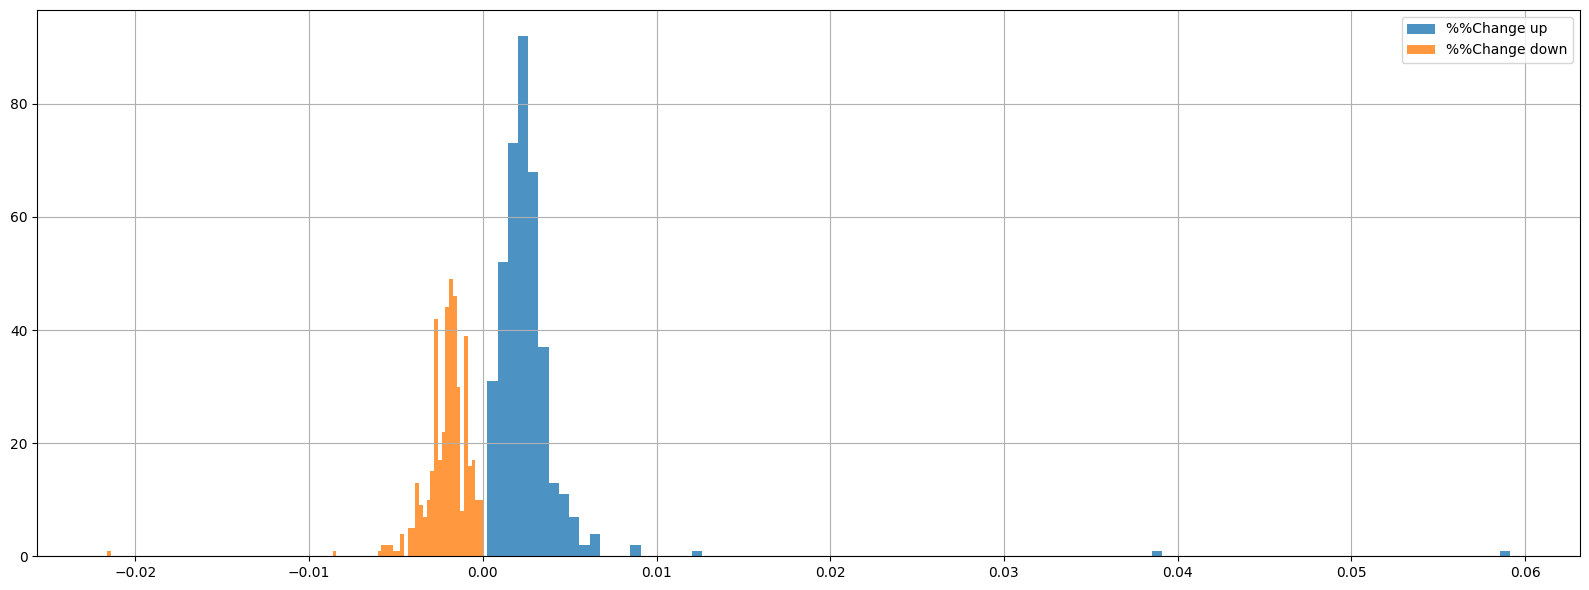

In [38]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(mag_up, alpha=0.8, label='%%Change up', bins=100)
ax.hist(mag_down, alpha=0.8, label='%%Change down', bins=100)
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

In [39]:
import optuna
from optuna.visualization import plot_optimization_history, plot_contour, plot_param_importances


def objective(trial):
    # Define the parameters to optimize
    upthres = trial.suggest_float('upthres', 0., 0.005)
    downthres = trial.suggest_float('downthres', 0., 0.005)
    return get_expected_profit(upthres, downthres)

study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=100) 

[I 2025-04-12 03:27:58,421] A new study created in memory with name: no-name-2278a438-f54b-4ae4-8cad-0396b484688a


[I 2025-04-12 03:27:58,804] Trial 0 finished with value: 664.9402673630531 and parameters: {'upthres': 0.0018234926776637167, 'downthres': 0.0032480159113574916}. Best is trial 0 with value: 664.9402673630531.
[I 2025-04-12 03:27:59,152] Trial 1 finished with value: 318.99098952927244 and parameters: {'upthres': 0.0032491037483231826, 'downthres': 0.004794826936711332}. Best is trial 0 with value: 664.9402673630531.
[I 2025-04-12 03:27:59,577] Trial 2 finished with value: -174.01946337134575 and parameters: {'upthres': 0.0007653946257403444, 'downthres': 0.0031876316151337332}. Best is trial 0 with value: 664.9402673630531.
[I 2025-04-12 03:27:59,927] Trial 3 finished with value: 472.503050478833 and parameters: {'upthres': 0.004999575973881805, 'downthres': 0.002856533699505371}. Best is trial 0 with value: 664.9402673630531.
[I 2025-04-12 03:28:00,315] Trial 4 finished with value: 274.27672482048376 and parameters: {'upthres': 0.0009413431788628135, 'downthres': 0.003957516854731566}

In [40]:
best_params = study.best_params
best_value = study.best_value
print(f"Best parameters: {best_params}")
print(f"Best value: {best_value}")

Best parameters: {'upthres': 0.0015724194653093707, 'downthres': 0.0012955762162962685}
Best value: 1075.6226357143476


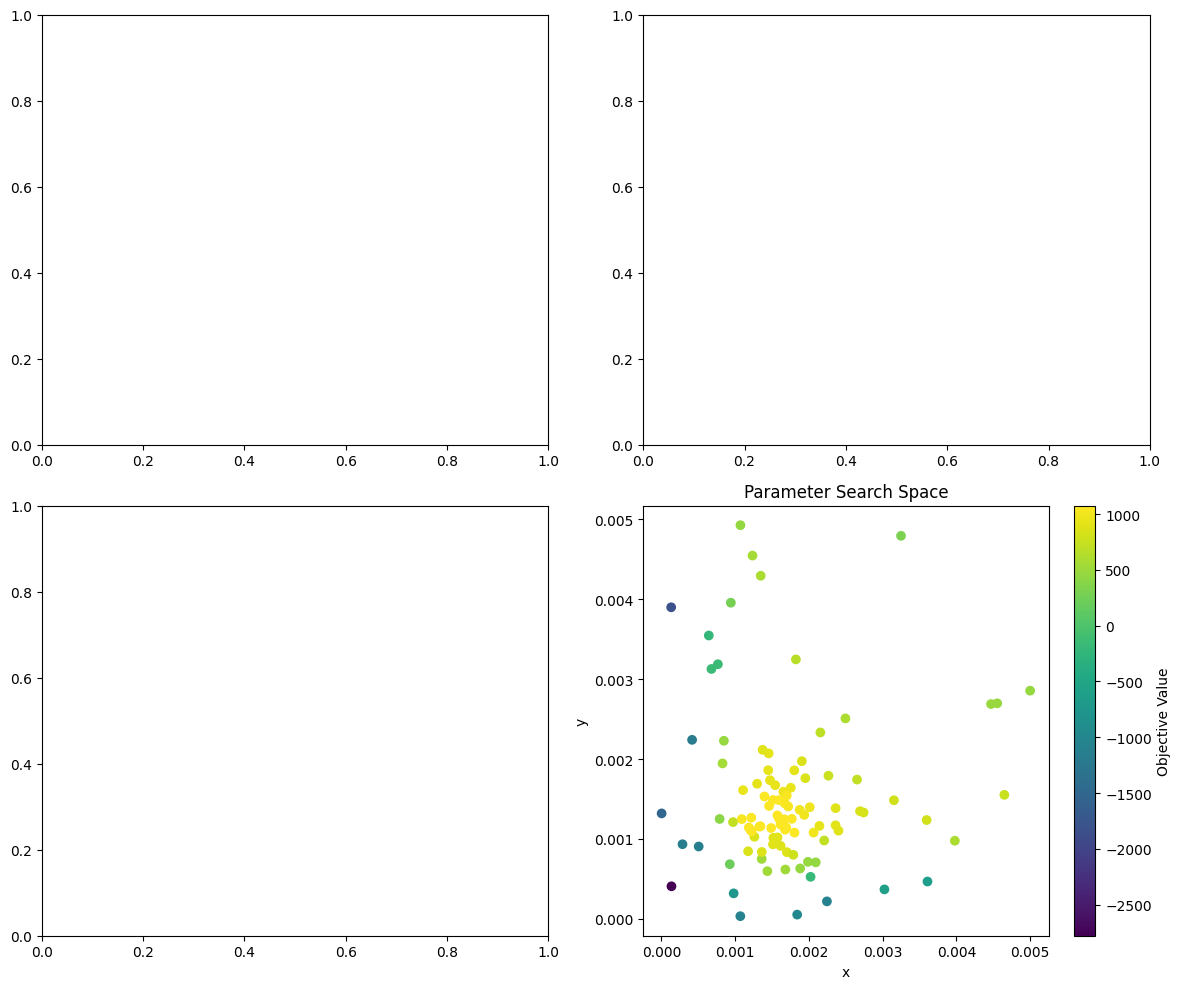

In [41]:
# Visualization of the optimization process
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plot_optimization_history(study)
plt.subplot(2, 2, 2)
plot_contour(study, params=['upthres', 'downthres'])
plt.subplot(2, 2, 3)
plot_param_importances(study)
plt.subplot(2, 2, 4)
x_values = [trial.params['upthres'] for trial in study.trials]
y_values = [trial.params['downthres'] for trial in study.trials]
objective_values = [trial.value for trial in study.trials]

plt.scatter(x_values, y_values, c=objective_values, cmap='viridis')
plt.colorbar(label='Objective Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parameter Search Space')
plt.tight_layout()
plt.show()

In [28]:
plot_optimization_history(study)
